<a href="https://colab.research.google.com/github/cagutierrezgu/My_Portfolio/blob/main/Clothes%20image%20classification/Models/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unsupervised K-Means.

Uno de los modelos más simples para modelos de agrupamiento es K-Means, el cual genera clusters según el centroide de cada uno de estos. Como primer análisis usando este modelo, se variará el número de clusters a generar por K-Means de 2 a 30 para elegir el más adecuado según el método del codo. Otro comentario importante sobre el modelo a usar consiste en que no se usará el K-Means tradicional, sino MiniBatchKMeans que se entrena tomando subconjuntos de datos del conjunto general, tomando menos tiempo en entrenarse. Los resultados son los siguientes:

In [ ]:
K = np.arange(2, 31, 2)
inercy = [
    - MiniBatchKMeans(n_clusters=k, random_state=333).fit(x).score(x)
    for k in K
    ]

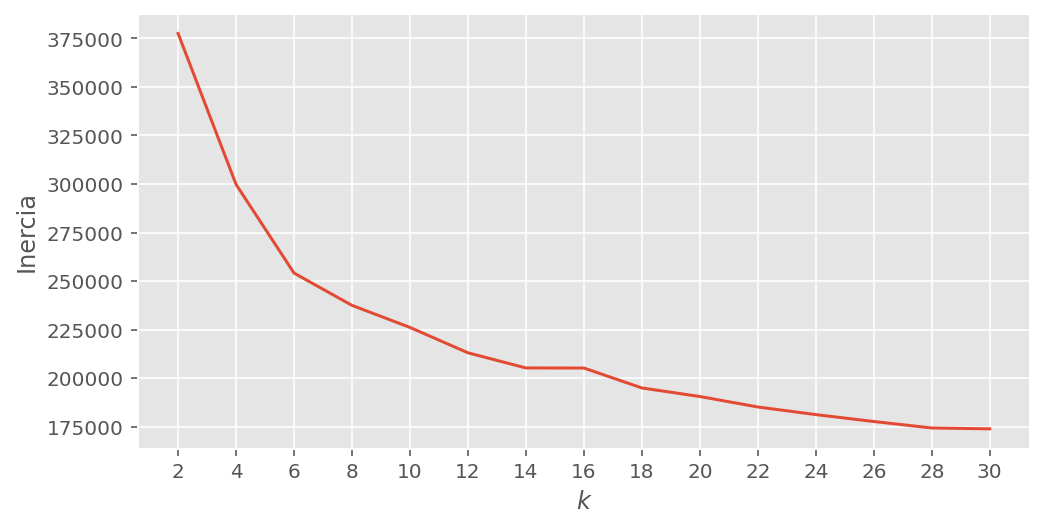

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(K, inercy)
ax.set_xticks(K)
ax.set_xlabel("$k$");
ax.set_ylabel("Inercia");

Visualmente no es lo suficientemente claro cuál es la mejor elección de k, el número de clusters, para clasificar las imágenes. Escogiendo un $k = 14$ para ver gráficamete los clusters generados se tiene:

In [ ]:
model_kmeans = MiniBatchKMeans(n_clusters=14, random_state=333)
model_kmeans.fit(x)
clusters = model_kmeans.predict(x)

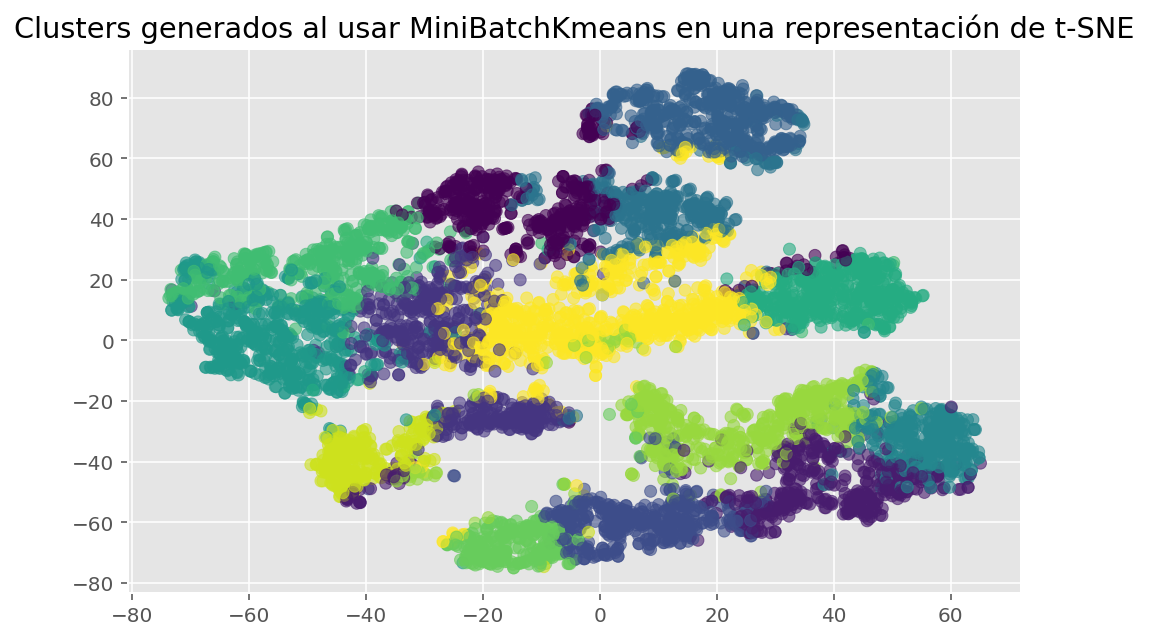

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(T[:, 0], T[:, 1], c=clusters, alpha=0.6);
ax.set_title('Clusters generados al usar MiniBatchKmeans en una representación de t-SNE');

La anterior gráfica deja ver que los clusters generados están distribuidos casi por todo el plano y en algunos casos parece no haber separación espacial entre uno y otro, lo cual también puede deberse a la representación generada por t-SNE, que no pudo ser la mejor para visualizar de mejor manera dichos clusters y sus diferencias.

Los modelos generados hasta el momento fueron sobre el conjunto original de imágenes de dimensión $24\times24 = 784$, pero este procedimiento puede repetirse sobre el conjunto al que fue aplicado PCA y observar sus resultados:

In [ ]:
K = np.arange(1, 15)
inercy = [
    - MiniBatchKMeans(n_clusters=k, random_state=333).fit(pca_data).score(pca_data)
    for k in K
    ]

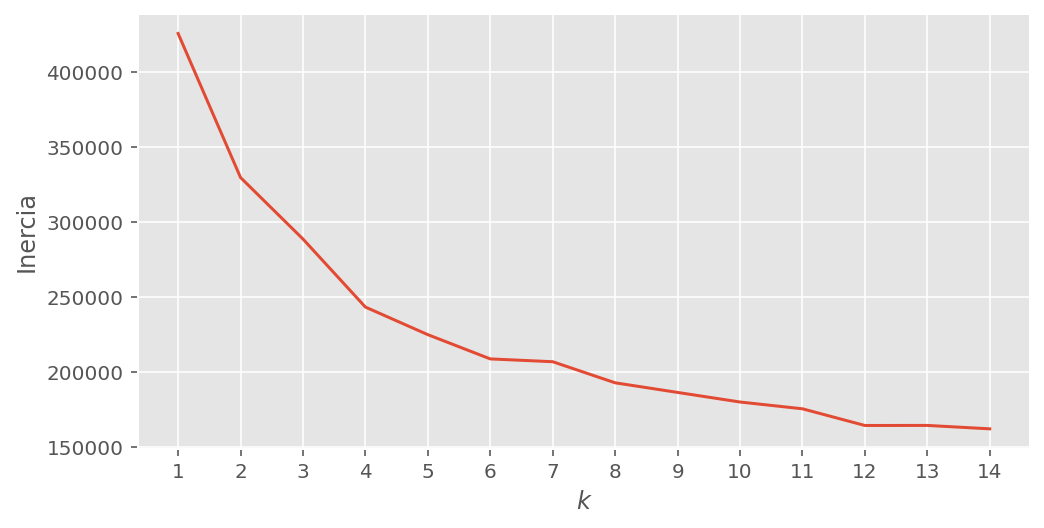

In [ ]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(K, inercy)
ax.set_xticks(K)
ax.set_xlabel("$k$");
ax.set_ylabel("Inercia");

Nuevamente, la gráfica para hacer uso del método del codo no es del todo determinante, así que escogemos un número $k=6$ de clusters para observar sus resultados gráficamente:

In [ ]:
model_kmeans_pca = MiniBatchKMeans(n_clusters=6, random_state=333)
model_kmeans_pca.fit(pca_data)
clusters_pca = model_kmeans_pca.predict(pca_data)

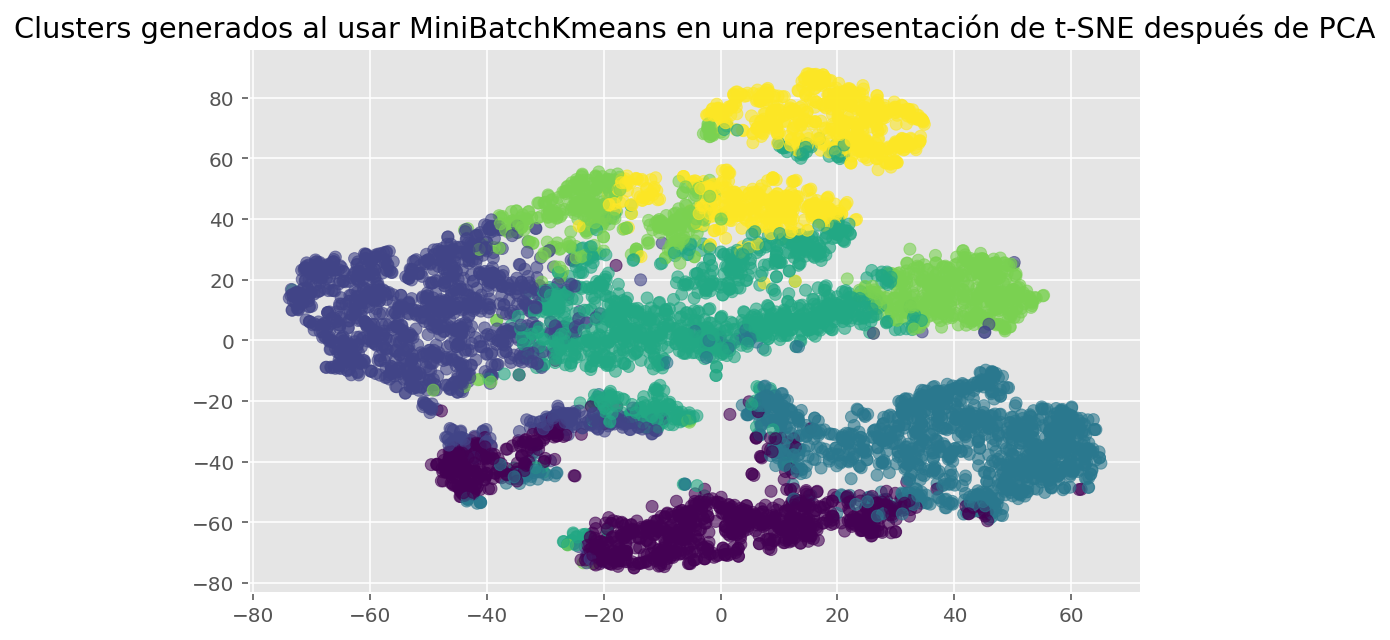

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(T[:, 0], T[:, 1], c=clusters_pca, alpha=0.6);
ax.set_title('Clusters generados al usar MiniBatchKmeans en una representación de t-SNE después de PCA');

En este caso se escogieron menos clusters generados por K-Means, pero aún no es posible determinar con certeza cuál es el número de clusters adecuado para el conjunto de imágenes. En la sección de evaluación se retomará esta discusión.